In [1]:
import sys
sys.path.append("../")  # look one directory up for qca modules, TODO: make a package
from copy import copy
from qca import QCA
from figures import names
from core1d import rule_hamiltonian
from states import make_state
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import multi_dot
from scipy.linalg import expm
from matrix import op_at, dagger
from measures import expectation
from time import time
%matplotlib inline

In [2]:
import matrix
import qca
import states
import core1d
from importlib import reload
reload(core1d)
reload(matrix)
reload(qca)
reload(states)


from qca import QCA, QCA_from_file, main_from_params_list
from states import make_state
from measures import get_rhoj, get_expectation
from matrix import ops

# 2-qubit ferromagnetic state at 45 degrees
psi = make_state(2, "ot45")

# verify
rhoj = get_rhoj(psi)
X = get_expectation(rhoj, ops["X"])
Y = get_expectation(rhoj, ops["Y"])
Z = get_expectation(rhoj, ops["Z"])
print(X)
print(Y)
print(Z)
np.arccos(Z/np.sqrt(X*X+Z*Z)) * 180/np.pi

[0.70710678 0.70710678]
[0. 0.]
[0.70710678 0.70710678]


array([45., 45.])

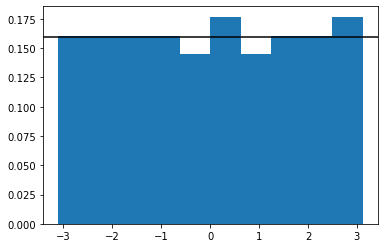

In [3]:
# Haar random matrix
from matrix import haar, isU, ops
U = haar(100) # 100-dimensional array
eigs = np.linalg.eigvals(U)

# haar random matrix is unitary and has eigenvalues exp(i theta) 
# with theta unifromly distributed 
phs = np.angle(eigs)
plt.hist(phs, density="True")
plt.axhline(1/(2*np.pi), c="k")

In [34]:
%%time
der = r"/home/lhillber/documents/research/cellular_automata/qca/data/"

run = False

Rs = [1, 8, 3, 10, 5, 12, 7, 14, 2,4,6,9,11,13,15]
ICs = ["c3_f1", "c3_f1_t0-p0_t180-p0"]



params_template = dict(
              T=100.0,
              L=16,
              dt=1.0,
              r=1,
              V="A",
              BC="0",
              E=0.0,
              N=1, # 1, 2, 10, 100
              totalistic=False,
              hamiltonian=False,
              trotter=True,
              symmetric=False)

params_list = []
Qs = np.zeros((len(ICs), len(Rs)), dtype="object")
for ICi, IC in enumerate(ICs):
    for Ri, R in enumerate(Rs):
        params = copy(params_template)
        params["R"] = R
        params["IC"] = IC
        params_list.append(params)
        if not run:
            Q = QCA(params, der=der)
            Qs[ICi, Ri] = Q
                
print(len(params_list))           
if run:
    main_from_params_list(params_list, 
                          tasks=["rhoj", "rhojk"], 
                          der=der, 
                          nprocs=-1,
                          recalc=True)

30
CPU times: user 11.3 ms, sys: 432 µs, total: 11.7 ms
Wall time: 13.6 ms


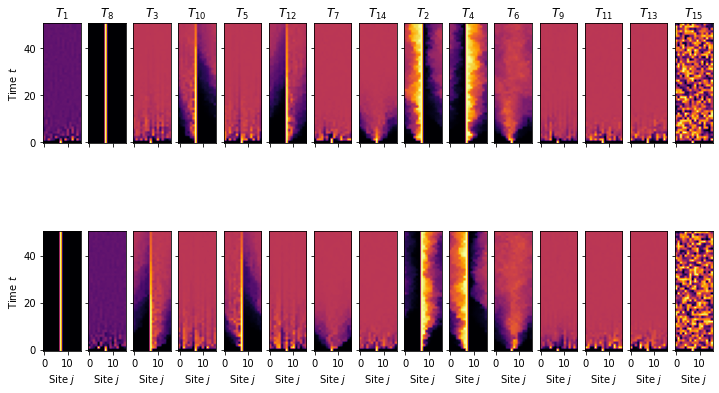

In [35]:
for measi, meas in enumerate(["exp_Z"]):
    fig, axs = plt.subplots(2, len(Rs), figsize=(12, 7))
    for ICi, IC in enumerate(ICs):
        for Ri, R in enumerate(Rs):
            Q = Qs[ICi, Ri]
            ax = axs[ICi, Ri]
            if meas == "s":
                cmap = "inferno"
                vmin=None
                vmax=1
            else:
                cmap = "inferno_r"
                vmin=None
                vmax=None
                
            if ICi == 0:
                
                cmap = "inferno_r"
            else:
                cmap = "inferno"
            Q.plot(meas, ax=ax, cbar=False, tmax=50, cmap=cmap, vmin=vmin, vmax=vmax)
            if Ri != 0:
                ax.set_ylabel("")
                ax.set_yticklabels([])
            if ICi != len(ICs)-1:
                ax.set_xlabel("")
                ax.set_xticklabels([])
            if ICi == 0:
                ax.set_title(r"$T_{%s}$"%R)
                

In [ ]:
Q.get_measure("exp_Y")[0]